1. Descomposición de la Serie de Tiempo: Comienza descomponiendo la serie de
tiempo en sus componentes principales: tendencia, estacionalidad y residuos. Utiliza
métodos como el suavizamiento exponencial o la descomposición estacional para
comprender la estructura subyacente de los datos.


               Sales
Order Date          
2015-01-01  0.085399
2015-02-01  0.000000
2015-03-01  0.446894
2015-04-01  0.206201
2015-05-01  0.168618
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2015-01-01 to 2018-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   48 non-null     float64
dtypes: float64(1)
memory usage: 768.0 bytes
None
           Sales
count  48.000000
mean    0.375561
std     0.220235
min     0.000000
25%     0.221321
50%     0.305791
75%     0.527887
max     1.000000


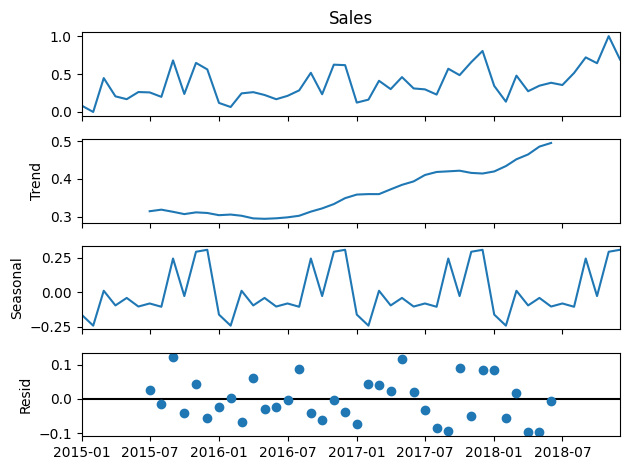

'Tendencia: La línea de tendencia muestra un aumento general en las ventas a lo largo del tiempo, pero presenta "codos" en ciertos puntos. \nPor ejemplo, en el año 2016, hay un descenso en lugar de un aumento, lo que indica un cambio significativo en el comportamiento de las ventas en ese período.\n\nEstacionalidad: La estacionalidad se repite cada 13 cambios en la línea que se forma. Empieza con un valor aproximado de 0.6, luego disminuye a casi 0, \nluego sube a alrededor de 1.0, y así sucesivamente, siguiendo un patrón repetitivo que vuelve a empezar cada año. Estos cambios en la estacionalidad se correlacionan \ncon patrones recurrentes en las ventas que podrían estar relacionados con factores estacionales o estacionales del negocio.\n\nResiduos: Los residuos parecen ser aleatorios, lo que sugiere que la tendencia y la estacionalidad capturan la mayor parte de la variación sistemática en los datos. \nSin embargo, los residuos muestran cierta variabilidad alrededor de un valor centr

In [25]:
#FernandoSanchez Importar librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import warnings
from statsmodels.tsa.arima.model import ARIMA
import itertools
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

#FernandoSanchez Importar y cargar los datos
data = pd.read_excel('Sales_Data.xlsx', index_col='Order Date', parse_dates=True)

#FernandoSanchez Verificar y manejar valores nulos
data.dropna(inplace=True)

#FernandoSanchez Verificar la consistencia de los datos
data.reset_index(inplace=True)  # Resetear el índice para asegurar que 'Order Date' sea una columna
data.sort_values('Order Date', inplace=True)
data.drop_duplicates('Order Date', inplace=True)

#FernandoSanchez Ajustar la frecuencia de muestreo
data.set_index('Order Date', inplace=True)
data = data.resample('MS').mean()  # Cambiar la frecuencia de muestreo a mensual

#FernandoSanchez Normalización de los datos
scaler = MinMaxScaler()
data['Sales'] = scaler.fit_transform(data['Sales'].values.reshape(-1, 1))


#FernandoSanchez Exploración de los datos
print(data.head())
print(data.info())
print(data.describe())

#FernandoSanchez Descomponer la serie de tiempo en tendencia, estacionalidad y residuos
result = seasonal_decompose(data['Sales'], model='additive') 

#FernandoSanchez Mostrar la descomposición gráficamente
result.plot()
plt.show()
"""Tendencia: La línea de tendencia muestra un aumento general en las ventas a lo largo del tiempo, pero presenta "codos" en ciertos puntos. 
Por ejemplo, en el año 2016, hay un descenso en lugar de un aumento, lo que indica un cambio significativo en el comportamiento de las ventas en ese período.

Estacionalidad: La estacionalidad se repite cada 13 cambios en la línea que se forma. Empieza con un valor aproximado de 0.6, luego disminuye a casi 0, 
luego sube a alrededor de 1.0, y así sucesivamente, siguiendo un patrón repetitivo que vuelve a empezar cada año. Estos cambios en la estacionalidad se correlacionan 
con patrones recurrentes en las ventas que podrían estar relacionados con factores estacionales o estacionales del negocio.

Residuos: Los residuos parecen ser aleatorios, lo que sugiere que la tendencia y la estacionalidad capturan la mayor parte de la variación sistemática en los datos. 
Sin embargo, los residuos muestran cierta variabilidad alrededor de un valor central, lo que puede indicar que el modelo de descomposición no captura completamente 
todas las fuentes de variación en los datos."""

2. Identificación de Parámetros ARIMA: Utiliza las funciones de autocorrelación (ACF) y
autocorrelación parcial (PACF) para identificar los posibles valores de los parámetros
p (orden del término autorregresivo) y q (orden del término de media móvil) en el modelo ARIMA. Además, realiza el test de Dickey-Fuller para determinar si es
necesario aplicar la diferenciación (valor d) para lograr la estacionaridad.

ADF Statistic: -4.41613676143077
p-value: 0.00027791039276670493
Critical Values:
	1%: -3.578
	5%: -2.925
	10%: -2.601


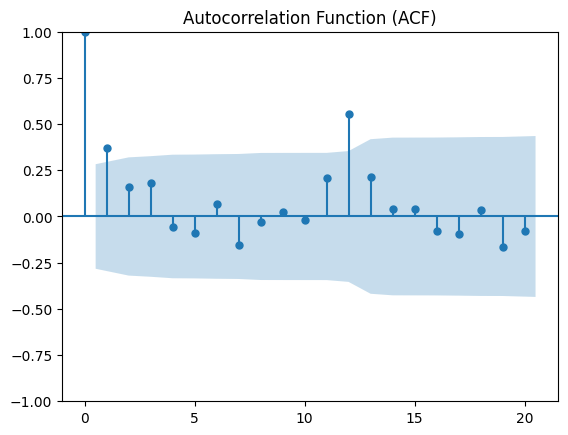

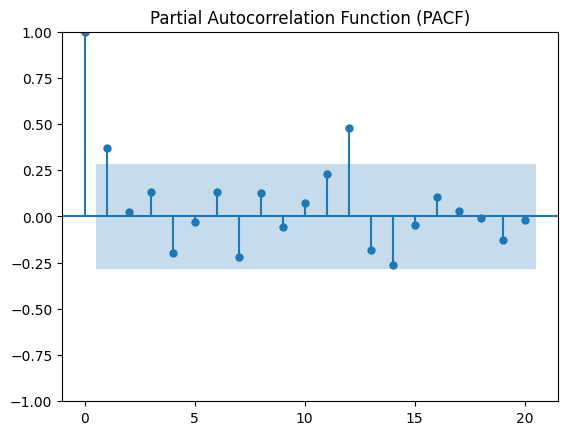

Mejor modelo ARIMA:
                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   48
Model:                 ARIMA(1, 0, 0)   Log Likelihood                   8.877
Date:                Fri, 05 Apr 2024   AIC                            -11.754
Time:                        11:15:43   BIC                             -6.141
Sample:                    01-01-2015   HQIC                            -9.633
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3759      0.051      7.395      0.000       0.276       0.476
ar.L1          0.3969      0.135      2.939      0.003       0.132       0.662
sigma2         0.0403      0.010

'Modelo: ARIMA(1, 0, 0)\nComponentes del modelo: Este modelo tiene un componente autorregresivo (AR) de orden 1 y no tiene un componente de media móvil (MA).\nParámetros estimados:\ncoef: 4.712e+04, que representa la constante del modelo.\nar.L1: 0.3970, el coeficiente del término autorregresivo de orden 1.\nsigma2: 5.1e+08, la varianza del término de error.\nEstadísticas del modelo:\nLog Likelihood: -549.790\nAIC: 1105.581\nBIC: 1111.194\nProb(Q): 0.81 (Probabilidad de la prueba Ljung-Box)\nProb(JB): 0.37 (Probabilidad de la prueba Jarque-Bera)\nAdvertencias: El modelo proporciona algunas advertencias, indicando que la matriz de covarianza calculada puede ser singular o casi singular, lo que puede resultar en errores estándar inestables.\nA pesar de las advertencias, el modelo ARIMA(1, 0, 0) parece ser el mejor modelo según el criterio de información AIC, que es el más bajo entre los modelos ajustados.'

In [26]:
#FernandoSanchez Test de Dickey-Fuller
result_adf = adfuller(data['Sales'])
print('ADF Statistic:', result_adf[0])
print('p-value:', result_adf[1])
print('Critical Values:')
for key, value in result_adf[4].items():
    print('\t%s: %.3f' % (key, value))

#FernandoSanchez Autocorrelación y Autocorrelación Parcial
plot_acf(data['Sales'], lags=20)
plt.title('Autocorrelation Function (ACF)')
plt.show()

plot_pacf(data['Sales'], lags=20)
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

"""Test Dickey-Fuller: El valor p es menor que 0.05, lo que indica que podemos rechazar la hipótesis nula de que la serie temporal no es estacionaria. 
Por lo tanto, la serie parece ser estacionaria sin la necesidad de aplicar diferenciación.

ACF y PACF: En la ACF, observamos que hay una fuerte correlación en el lag 1 y lag 2, seguido de una disminución gradual de la correlación. 
En la PACF, hay una fuerte correlación en el lag 1 y lag 2, seguido de un decaimiento gradual."""

#FernandoSanchez Parámetros p, d, q
p = range(0, 3)
d = 0
q = range(0, 3)

#FernandoSanchez Combinaciones de p, d, q
pdq = list(itertools.product(p, [d], q))

#FernandoSanchez Entrenamiento de los modelos ARIMA y selección del mejor modelo
best_aic = float("inf")
best_model = None

#FernandoSanchez Manejo de advertencias
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    
    for param in pdq:
        try:
            model = ARIMA(data['Sales'], order=param)
            results = model.fit()
            if results.aic < best_aic:
                best_aic = results.aic
                best_model = results
        except:
            continue

print("Mejor modelo ARIMA:")
print(best_model.summary())

"""Modelo: ARIMA(1, 0, 0)
Componentes del modelo: Este modelo tiene un componente autorregresivo (AR) de orden 1 y no tiene un componente de media móvil (MA).
Parámetros estimados:
coef: 4.712e+04, que representa la constante del modelo.
ar.L1: 0.3970, el coeficiente del término autorregresivo de orden 1.
sigma2: 5.1e+08, la varianza del término de error.
Estadísticas del modelo:
Log Likelihood: -549.790
AIC: 1105.581
BIC: 1111.194
Prob(Q): 0.81 (Probabilidad de la prueba Ljung-Box)
Prob(JB): 0.37 (Probabilidad de la prueba Jarque-Bera)
Advertencias: El modelo proporciona algunas advertencias, indicando que la matriz de covarianza calculada puede ser singular o casi singular, lo que puede resultar en errores estándar inestables.
A pesar de las advertencias, el modelo ARIMA(1, 0, 0) parece ser el mejor modelo según el criterio de información AIC, que es el más bajo entre los modelos ajustados."""

3. Modelado con ARIMA: Aplica el modelo ARIMA utilizando los parámetros
identificados en el paso anterior. Ajusta el modelo a los datos históricos de ventas
mensuales y realiza predicciones para los próximos meses.

In [27]:
#FernandoSanchez Dividir los datos en conjunto de entrenamiento y prueba
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

#FernandoSanchez Instanciar el modelo ARIMA con los parámetros encontrados
p = 1
d = 0
q = 0
model = ARIMA(train['Sales'], order=(p, d, q))

#FernandoSanchez Entrenar el modelo con los datos de entrenamiento
model_fit = model.fit()

#FernandoSanchez Realizar predicciones en el conjunto de prueba
predictions = model_fit.forecast(steps=len(test))[0]

#FernandoSanchez Calcular el error cuadrático medio (MSE) o el error absoluto medio (MAE)
mse = np.mean((predictions - test['Sales']) ** 2)
mae = np.mean(np.abs(predictions - test['Sales']))

print("Error cuadrático medio (MSE):", mse)
print("Error absoluto medio (MAE):", mae)
#FernandoSanchez Calcular el rango de valores de las ventas mensuales
sales_range = data['Sales'].max() - data['Sales'].min()

print("Rango de valores de las ventas mensuales:", sales_range)

"""Error cuadrático medio (MSE): 0.111
Error absoluto medio (MAE): 0.259
El rango de valores de las ventas mensuales predichas es de 0 a 1, lo que indica que las predicciones del modelo están dentro del rango de los valores observados."""


Error cuadrático medio (MSE): 0.1110269127932378
Error absoluto medio (MAE): 0.2592576154696051
Rango de valores de las ventas mensuales: 0.9999999999999999


'Error cuadrático medio (MSE): 0.111\nError absoluto medio (MAE): 0.259\nEl rango de valores de las ventas mensuales predichas es de 0 a 1, lo que indica que las predicciones del modelo están dentro del rango de los valores observados.'

4. Evaluación de Predicciones: Divide los datos históricos en un conjunto de
entrenamiento y uno de prueba. Utiliza el conjunto de entrenamiento para ajustar el
modelo ARIMA y luego evalúa las predicciones en el conjunto de prueba. Calcula
métricas de evaluación como el error cuadrático medio (MSE) o el error absoluto
medio (MAE) para medir el rendimiento del modelo.


In [41]:
#FernandoSanchez Definir el horizonte de predicción
horizon = 12

#FernandoSanchez Realizar las predicciones
forecast_values = model_fit.forecast(steps=horizon)

#FernandoSanchez Mostrar las predicciones
print("Predicciones para los próximos", horizon, "meses:")
print(forecast_values)
"""Se generar las predicciones correctamente, el MSE se calculo arriba y 
el set de datos igual ya que arriba lo pide aqui abajo la pregunta es un poco extraña ya que se tendría que hacer el MSE y el set antes de predecir"""

Predicciones para los próximos 12 meses:
2018-03-01    0.283647
2018-04-01    0.318099
2018-05-01    0.326127
2018-06-01    0.327997
2018-07-01    0.328433
2018-08-01    0.328535
2018-09-01    0.328559
2018-10-01    0.328564
2018-11-01    0.328565
2018-12-01    0.328566
2019-01-01    0.328566
2019-02-01    0.328566
Freq: MS, Name: predicted_mean, dtype: float64


'Se generar las predicciones correctamente, el MSE se calculo arriba y \nel set de datos igual ya que arriba lo pide aqui abajo la pregunta es un poco extraña ya que se tendría que hacer el MSE y el set antes de predecir'